> [!NOTE]
> This package qiskit.pulse is depricated in favour of qiskit_dynamics
>
> The functions `qiskit.scheduler.utils.format_meas_map()`, `qiskit.scheduler.utils.measure()`, and `qiskit.scheduler.utils.measure_all()` had been moved to `qiskit.pulse.utils.format_meas_map()`, `qiskit.pulse.macros.measure()`, and `qiskit.pulse.macros.measure_all()` respectively. The previous location was deprecated in Qiskit 0.20.0 (Terra 0.15.0, released on 2020-08-10) and it is no longer supported.

- **schedulers**: instructions which control the electronic components of the quantum sys.
- **pulses** a signal which actually manuplate the qubits on the quantum sys. Aka the pulse is tuned for specific qubit so that that only gets manipulated. it is created by Arbitary waveform Generator(AWG) wherein the `𝑓`, `ϕ` are set by `SetFrquency`, `ShiftPhase` respectively

In [6]:
from qiskit.pulse import DriveChannel, Play, Schedule, Waveform
from qiskit.pulse.macros import measure_all

In essence, the Acquire instruction performs the following steps:

    Applies a measurement signal to the specified channel for the given duration.
    Acquires the raw data from the channel.
    Processes the raw data using the specified kernel.
    Classifies the processed data into a classical bit (0 or 1) using the discriminator.
    Stores the raw data in the mem_slot and the classified result in the reg_slot.

In Pulses
pre-installed waveforms available are Constant, Drag, discrete, Gaussian, GaussianSquare, Waveform, ...

In [7]:
import numpy as np

In [8]:
x = np.linspace(start=0, stop=2*np.pi, num=64)

In [9]:
x

array([0.        , 0.0997331 , 0.1994662 , 0.2991993 , 0.3989324 ,
       0.4986655 , 0.5983986 , 0.6981317 , 0.7978648 , 0.8975979 ,
       0.997331  , 1.0970641 , 1.1967972 , 1.2965303 , 1.3962634 ,
       1.4959965 , 1.5957296 , 1.6954627 , 1.7951958 , 1.8949289 ,
       1.994662  , 2.0943951 , 2.1941282 , 2.2938613 , 2.3935944 ,
       2.4933275 , 2.5930606 , 2.6927937 , 2.7925268 , 2.8922599 ,
       2.991993  , 3.0917261 , 3.1914592 , 3.2911923 , 3.3909254 ,
       3.4906585 , 3.5903916 , 3.6901247 , 3.7898578 , 3.8895909 ,
       3.989324  , 4.0890571 , 4.1887902 , 4.2885233 , 4.38825641,
       4.48798951, 4.58772261, 4.68745571, 4.78718881, 4.88692191,
       4.98665501, 5.08638811, 5.18612121, 5.28585431, 5.38558741,
       5.48532051, 5.58505361, 5.68478671, 5.78451981, 5.88425291,
       5.98398601, 6.08371911, 6.18345221, 6.28318531])

In [10]:
data = np.sin(x)

In [11]:
data

array([ 0.00000000e+00,  9.95678466e-02,  1.98146143e-01,  2.94755174e-01,
        3.88434796e-01,  4.78253979e-01,  5.63320058e-01,  6.42787610e-01,
        7.15866849e-01,  7.81831482e-01,  8.40025923e-01,  8.89871809e-01,
        9.30873749e-01,  9.62624247e-01,  9.84807753e-01,  9.97203797e-01,
        9.99689182e-01,  9.92239207e-01,  9.74927912e-01,  9.47927346e-01,
        9.11505852e-01,  8.66025404e-01,  8.11938006e-01,  7.49781203e-01,
        6.80172738e-01,  6.03804410e-01,  5.21435203e-01,  4.33883739e-01,
        3.42020143e-01,  2.46757398e-01,  1.49042266e-01,  4.98458857e-02,
       -4.98458857e-02, -1.49042266e-01, -2.46757398e-01, -3.42020143e-01,
       -4.33883739e-01, -5.21435203e-01, -6.03804410e-01, -6.80172738e-01,
       -7.49781203e-01, -8.11938006e-01, -8.66025404e-01, -9.11505852e-01,
       -9.47927346e-01, -9.74927912e-01, -9.92239207e-01, -9.99689182e-01,
       -9.97203797e-01, -9.84807753e-01, -9.62624247e-01, -9.30873749e-01,
       -8.89871809e-01, -

/tmp/ipykernel_21/2744049087.py:1: DeprecationWarning: The class ``qiskit.pulse.library.waveform.Waveform`` is deprecated as of Qiskit 1.3. It will be removed in Qiskit 2.0. The entire Qiskit Pulse package is being deprecated and will be moved to the Qiskit Dynamics repository: https://github.com/qiskit-community/qiskit-dynamics
  sample = Waveform(samples=data, name="sine_pulse")


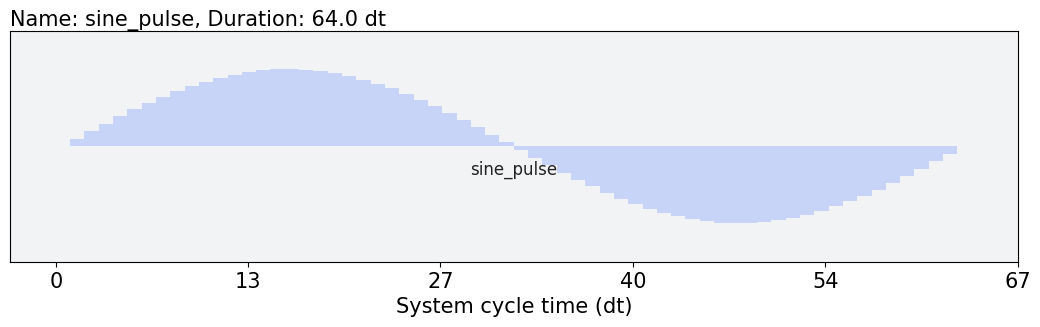

In [12]:
sample = Waveform(samples=data, name="sine_pulse")
sample.draw()

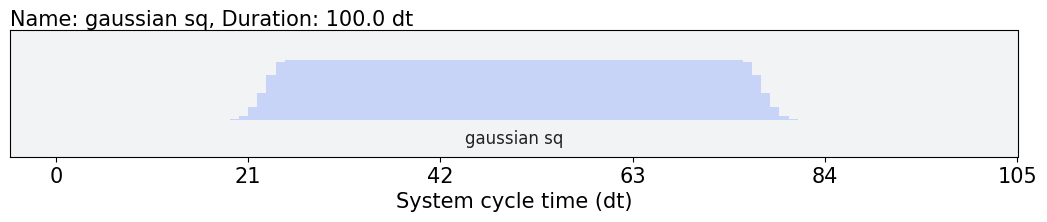

In [37]:
from qiskit.pulse import GaussianSquare
x = GaussianSquare(duration=100, amp=1, sigma=2, width=50, angle=0.0, name="gaussian sq")
x.draw(show_waveform_info=True)

2 channels:
- pulse: transmits the generated pulses
  - drive: it transmit pulse to the qubit for exec of gate ops
  - control: (multi-qubit) like Control-Not, Control-Phase, .. provide auxillary control over the qubit over the drive channel
  - measure: it used to send measurement pulse to the qubit for readout from the qubit
- acquisition channel: it recieves pulses from the quantum sys
  - acquire: used to recieve information from the device, collect data from the quantum device